# The Data Cleaning Process

In [1]:
## Import the necessary dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Load the Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Check the shape of the dataset and some info about the data

In [3]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Handle Irrelevant Data

In [4]:
# check for columns and drop any unneeded column(s)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# The PassengerId feature is a unqiue ID for the Passenger and so can be removed

df = df.drop("PassengerId", axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# The Ticket feature can also be removed
df = df.drop("Ticket", axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [8]:
# confim and make sure all the non - reqired 
# columns have been removed
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

# Deduplicate your data

In [9]:
# check the size of your dataset so you can 
# keep track of any row or datapoint that was removed
df.shape

(891, 10)

In [11]:
# Using the "Name" columns we will like to remove any
# rows with the same Name, that is, we will like to
# remove duplicates from our dataset (if any)

# sorting by first (Alphebetically from A - Z)
df.sort_values("Name", inplace = True)
 
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
845,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,7.5500,NaN,S
746,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,20.2500,NaN,S
279,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,20.2500,NaN,S
308,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,24.0000,NaN,C
874,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,24.0000,NaN,C
...,...,...,...,...,...,...,...,...,...,...
286,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,9.5000,NaN,S
282,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,9.5000,NaN,S
361,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,27.7208,NaN,C
153,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,14.5000,NaN,S


In [13]:
# dropping ALL duplicate values
df.drop_duplicates(subset ="Name",
                     keep = False, inplace = True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
845,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,7.5500,NaN,S
746,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,20.2500,NaN,S
279,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,20.2500,NaN,S
308,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,24.0000,NaN,C
874,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,24.0000,NaN,C
...,...,...,...,...,...,...,...,...,...,...
286,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,9.5000,NaN,S
282,0,3,"de Pelsmaeker, Mr. Alfons",male,16.0,0,0,9.5000,NaN,S
361,0,2,"del Carlo, Mr. Sebastiano",male,29.0,1,0,27.7208,NaN,C
153,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,14.5000,NaN,S


In [14]:
# check the size againt to know 
# if any datapoint was removed
df.shape

(891, 10)

 Since the number of rows in the dataset remained
 the same, therefore the dataset does not have any duplicate.

# Fix structural errors

In [18]:
# The aim of this section is to rename the different 
# class in our categorigal feature that were not properly named.
# or chanage the data type of a column

cat_features = {
    "Sex",
    "Embarked",
    "Pclass"
}

for cat_feature in cat_features:
      print(df[cat_feature].unique())

[3 2 1]
['male' 'female']
['S' 'C' 'Q' nan]


# Deal with missing data

In [19]:
# Firstky we idenity the colunms with
# missing values and their count

df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [20]:
# Age, Cabin and Embarked all have missing values
# Cabin have almost 80% of its values missing so 
# we will have to remove it

df = df.drop("Cabin", axis=1)

In [26]:
# For Embarked, we can replace the Nan values with the
# most frequently occuring class in that feature using .mode()
mode_value = df["Embarked"].mode()[0]
print(mode_value)

df["Embarked"].fillna(mode_value, inplace=True)

S


In [31]:
# For Age we can replace the missing value with the mean Age
mean_value = df["Age"].mean()
print(int(mean_value))

df["Age"].fillna(mean_value, inplace=True)

29


# Filter out data outliers

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


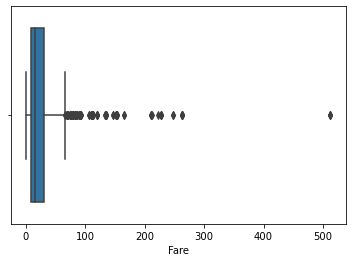

In [32]:
# Using the Box plot we can check our dataset
# to know if we have any outliers
# We are checking the Fare column to see if
# any of the prices are expectionally higher than the rest 

import seaborn as sns
sns.boxplot(df['Fare']);

In [33]:
# Removing the Outliers in Fare column
# Here, we define a function called "Outliers" which returns a list of index of outliers
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df.index[(df[ft]< lower_bound) | (df[ft]> upper_bound)]
    return ls

In [34]:
# Next, We create an empty list to store the output indices from Fare column
index_list = []
for feature in ['Fare']:
    index_list.extend(outliers(df, feature))
index_list

[730,
 305,
 297,
 498,
 275,
 700,
 369,
 290,
 118,
 299,
 218,
 380,
 484,
 291,
 269,
 337,
 679,
 802,
 435,
 390,
 763,
 741,
 257,
 708,
 835,
 745,
 540,
 1,
 385,
 445,
 544,
 716,
 496,
 527,
 306,
 341,
 88,
 27,
 438,
 660,
 334,
 587,
 139,
 453,
 849,
 332,
 268,
 789,
 645,
 52,
 62,
 230,
 681,
 310,
 820,
 655,
 665,
 120,
 765,
 72,
 224,
 486,
 61,
 537,
 737,
 627,
 195,
 689,
 504,
 34,
 375,
 245,
 412,
 215,
 393,
 659,
 336,
 151,
 505,
 307,
 520,
 879,
 373,
 557,
 779,
 759,
 311,
 742,
 159,
 180,
 863,
 792,
 846,
 201,
 324,
 641,
 609,
 319,
 31,
 591,
 829,
 585,
 262,
 558,
 698,
 550,
 581,
 256,
 258,
 366,
 124,
 102,
 318,
 856,
 377,
 325]

All of the indices listed above countain Outliers

In [39]:
# Next we define a function "remove" which returns a cleaned dataframe without outliers
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [40]:
df_cleaned = remove(df, index_list)
df_cleaned

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
845,0,3,"Abbing, Mr. Anthony",male,42.000000,0,0,7.5500,S
746,0,3,"Abbott, Mr. Rossmore Edward",male,16.000000,1,1,20.2500,S
279,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.000000,1,1,20.2500,S
308,0,2,"Abelson, Mr. Samuel",male,30.000000,1,0,24.0000,C
874,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.000000,1,0,24.0000,C
...,...,...,...,...,...,...,...,...,...
286,1,3,"de Mulder, Mr. Theodore",male,30.000000,0,0,9.5000,S
282,0,3,"de Pelsmaeker, Mr. Alfons",male,16.000000,0,0,9.5000,S
361,0,2,"del Carlo, Mr. Sebastiano",male,29.000000,1,0,27.7208,C
153,0,3,"van Billiard, Mr. Austin Blyler",male,40.500000,0,2,14.5000,S


In [41]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 845 to 868
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Name      775 non-null    object 
 3   Sex       775 non-null    object 
 4   Age       775 non-null    float64
 5   SibSp     775 non-null    int64  
 6   Parch     775 non-null    int64  
 7   Fare      775 non-null    float64
 8   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 60.5+ KB


In [42]:
df_cleaned.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

REvisualize your dataset

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


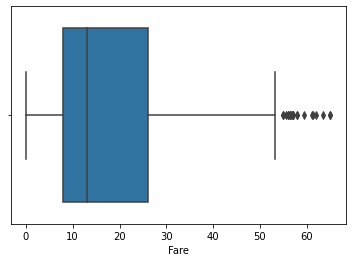

In [43]:
sns.boxplot(df_cleaned['Fare']);

Finally we save our cleaned dataset into a csv file 

In [44]:
df_cleaned.to_csv('cleaned tips dataset.csv', index = False)

In [45]:
clean = pd.read_csv('cleaned tips dataset.csv')
clean

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Abbing, Mr. Anthony",male,42.000000,0,0,7.5500,S
1,0,3,"Abbott, Mr. Rossmore Edward",male,16.000000,1,1,20.2500,S
2,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.000000,1,1,20.2500,S
3,0,2,"Abelson, Mr. Samuel",male,30.000000,1,0,24.0000,C
4,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.000000,1,0,24.0000,C
...,...,...,...,...,...,...,...,...,...
770,1,3,"de Mulder, Mr. Theodore",male,30.000000,0,0,9.5000,S
771,0,3,"de Pelsmaeker, Mr. Alfons",male,16.000000,0,0,9.5000,S
772,0,2,"del Carlo, Mr. Sebastiano",male,29.000000,1,0,27.7208,C
773,0,3,"van Billiard, Mr. Austin Blyler",male,40.500000,0,2,14.5000,S


In [1]:
! pip install XGBoost

ERROR: Could not find a version that satisfies the requirement XGBoost (from versions: none)
ERROR: No matching distribution found for XGBoost
